In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Byte Degree/data")
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Colab Notebooks/Byte Degree/data'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **① 문제상황**
---
> **시나리오** 🏭

```
'반도체 공정 이상 탐지' 프로젝트 팀은 반도체 제조의 복잡한 프로세스에 대한 새로운 프로젝트를 맡게 되었습니다. 이 프로젝트는 센서와 설비에서
수집된 다양한 신호와 변수들을 세심하게 모니터링하는 일로부터 시작됩니다. 이 신호들이 모두 동일한 중요성을 가지는 것은 아니라는 점이 현업이
요구한 내용의 핵심이며 우리 팀이 풀어가야하는 핵심문제입니다.

우리가 분석할 데이터는 유용한 정보, 관련 없는 정보, 그리고 잡음이 혼합된 복잡합니다. 우리에게는 실제로 필요한 것보다 많은 신호들이 주어져 있으며,
일반적으로 엔지니어들은 각각의 신호 유형을 하나의 독특한 특성으로 보고 접근합니다. Feature Engineering(특성 선택 기법)을 적용하여,
우리는 가장 관련성 높은 신호들을 선별해 내며, 이러한 신호들을 활용해 공정에서 발생할 수 있는 수율 이탈의 주요 원인들을 파악하려 합니다.

이 과정은 공정의 효율성을 향상시키고, 생산 비용을 절감할 수 있는 다양한 인사이트를 제공할 수 있을 것이라 기대됩니다. 이 신호들은 또한
반도체의 생산의 Pass/Fail 을 예측하는 데 사용될 수 있는 귀중한 특성으로 활용됩니다. 다양한 특성 조합을 탐색하고 실험함으로써,
우리는 수율 유형에 중대한 영향을 미치는 핵심 신호들을 식별할 수 있습니다.

정리하자면 우리 팀의 목표는 바로 반도체 공정 프로세스의 합격/불합격 수율을 예측할 수 있는 가장 의미 있는 신호를 찾아내고,
반도체 제조 과정의 품질과 효율성을 한 단계 끌어올리는 것입니다.

```

## **🌼 Data Analysis 1단계**  
**┗ 데이터 Info Check**  
---

```
수집된 데이터의 기본 정보들을 확인하고, 이상이 있을 시 전처리 수행

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값/Constant(상수) 값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)

  (5) 중복 데이터 Check
```  

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|Time|측정시간|
|0~589|센서 데이터 Value|
|Pass/Fail|불량여부 (-1:불량, 1:양품)|

590개의 변수
얼마나 적은 양의 데이터로 pass와 fail을 잘 구분할 수 있는 좋은 피쳐를 선정하는 것이 프로젝트의 주요 목표(피처 셀렉션)
-> 모델의 성능을 높이는 가장 좋은 방법

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('uci-secom.csv')
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
# (1) Data shape(형태) 확인
df.shape

(1567, 592)

In [ ]:
# (2) Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: datetime64[ns](1), float64(590), int64(1)
memory usage: 7.1 MB


In [ ]:
# (3) Null값/Constant(상수) 값 확인 (※ 빈 값의 Data)
df.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [ ]:
# (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)
# 이상치 확인 함수 정의
def detect_outliers_zscore(df, threshold=3):
    outliers = pd.DataFrame()
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):  # 숫자형 변수만 고려
            z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
            outliers_col = df[z_scores > threshold]
            outliers = pd.concat([outliers, outliers_col], axis=0)
    return outliers

# 이상치 확인 (Z-score threshold는 기본적으로 3)
outliers_df_zscore = detect_outliers_zscore(df)

print("Z-score를 이용한 이상치 확인 결과:")
print(outliers_df_zscore)

Z-score를 이용한 이상치 확인 결과:
                    Time        0        1          2          3       4  \
324  2008-08-20 06:36:00  2787.49  2584.15  2224.0000  1510.0797  1.5611   
395  2008-08-22 01:54:00  3245.00  2371.45  2196.8000  1090.0084  1.3270   
434  2008-08-23 05:57:00  3266.04  2417.04  2217.3777  1425.1041  1.7585   
520  2008-08-29 07:18:00  2792.24  2533.76  2180.7000  1159.3838  1.0177   
647  2008-02-09 01:09:00  2743.24  2614.54  2171.3222   966.5755  0.8066   
...                  ...      ...      ...        ...        ...     ...   
1365 2008-06-10 15:00:00  2988.39  2493.72  2206.4000   982.5452  1.1853   
1400 2008-07-10 13:10:00  3052.98  2515.51  2172.8111   969.3436  1.2736   
1438 2008-09-10 04:34:00  2951.84  2477.13  2192.1889  1435.9611  2.3870   
1443 2008-09-10 15:55:00  3173.18  2428.64  2209.4667  1556.3930  1.4884   
1519 2008-10-15 02:42:00  2903.34  2585.48  2196.1111  1472.6400  1.5599   

          5         6       7       8  ...       581     582   

```
이상치에 대한 추가적인 정보가 필요하므로 변수 정제에 어려움이 있음
```

In [ ]:
# (5) 중복 데이터 Check
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1562    False
1563    False
1564    False
1565    False
1566    False
Length: 1567, dtype: bool

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(1567, 592)

## **🌞 Data Analysis 2단계**  
**┗ 데이터 EDA 및 분석 프로세스 설계**  
---

```
데이터 탐색을 통해 데이터에 대한 이해도를 향상시키고, 분석 방향성을 설계하는 단계

※ 수강생 학습 및 적용해야하는 사항
 - 데이터 표준화(standardization), 정규화(normalization) 개념
 - 왜 표준화/정규화를 해야하는지?
 - Feature Engineering의 이해
```  

### · Data Readiness Check
---
* 데이터 특성 파악을 위한 초기 탐색
* 현재 우리가 가지고 있는 데이터로 문제를 풀 수 있는지 확인하는 과정

In [ ]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
df['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

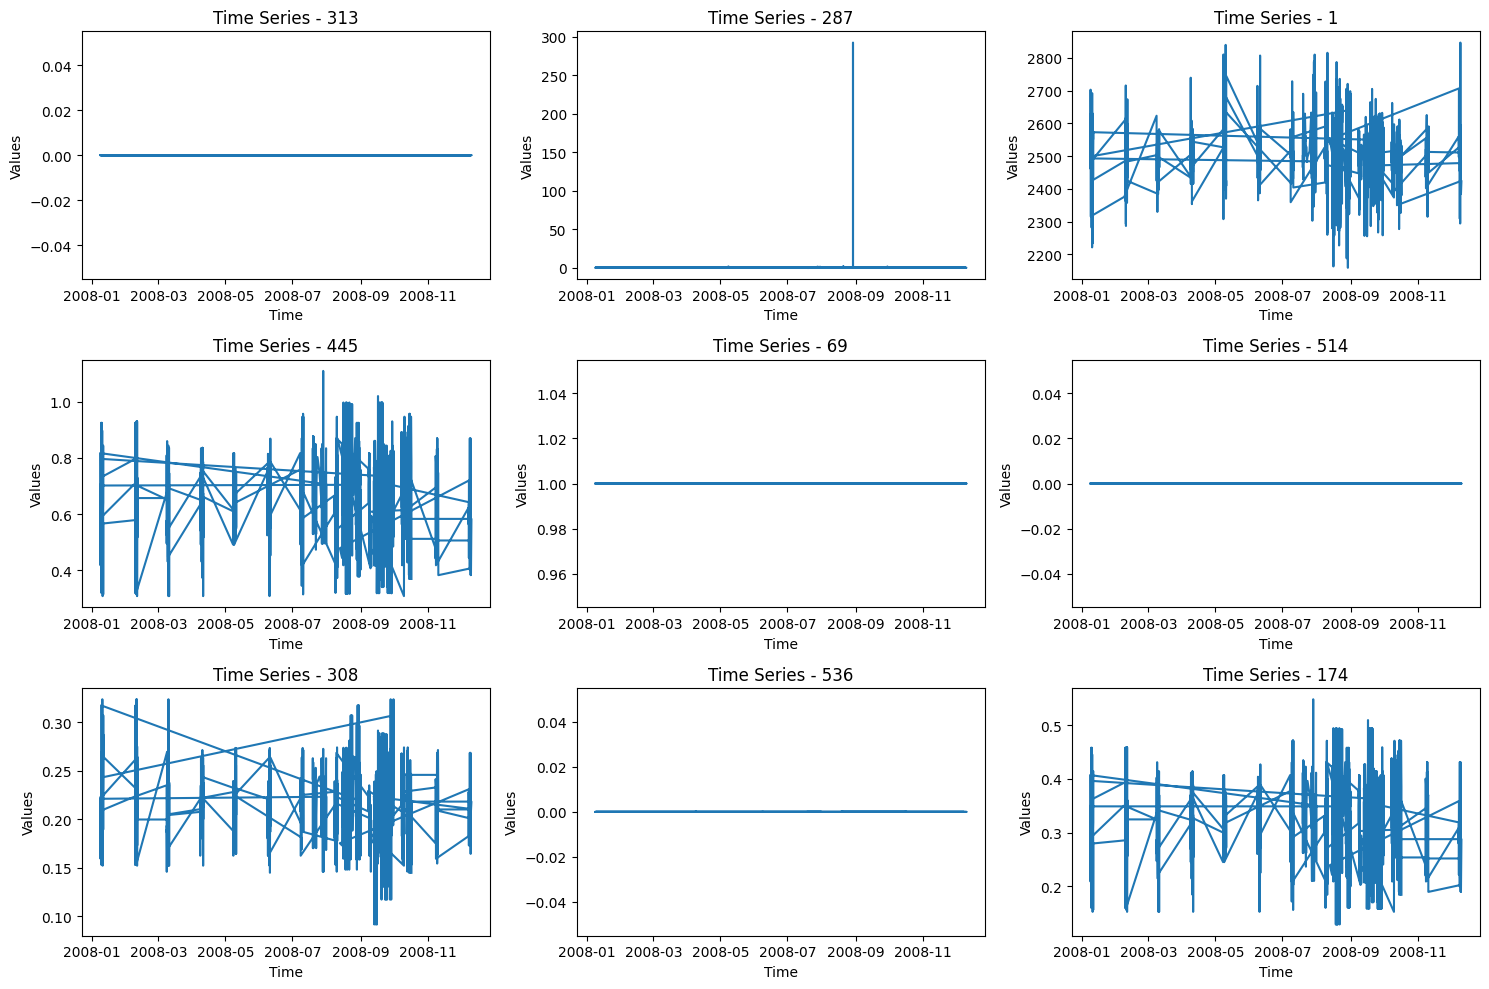

In [ ]:
# 시드(seed) 설정
np.random.seed(2024)

# 9개의 변수 중 9개를 랜덤으로 선택
selected_vars = np.random.choice(df.columns[1:], 9, replace=False)

# 각 변수에 대한 시계열 그래프 그리기
plt.figure(figsize=(15, 10))
for i, var in enumerate(selected_vars, 1):
    plt.subplot(3, 3, i)
    plt.plot(df['Time'], df[var])
    plt.title(f'Time Series - {var}')
    plt.xlabel('Time')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

### · Data Standardization
---
* 데이터 표준화를 통해 각 Feature를 동일한 수준에서 비교

In [ ]:
from sklearn.preprocessing import StandardScaler

# datetime 및 int형 변수를 제외하고 나머지 변수 선택
selected_columns = df.select_dtypes(exclude=['datetime64', 'int']).columns

# 선택된 변수들을 표준화
scaler = StandardScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])

# 결과 출력
print("Original Data:")
print(df.head())

Original Data:
                 Time         0         1         2         3         4    5  \
0 2008-07-19 11:55:00  0.223879  0.847825 -0.434320  0.033405 -0.050354  0.0   
1 2008-07-19 12:32:00  1.105015 -0.382054  1.012583  0.152382 -0.059776  0.0   
2 2008-07-19 13:17:00 -1.112023  0.797316 -0.479135  0.683141 -0.047691  0.0   
3 2008-07-19 14:43:00 -0.349640 -0.198431 -0.051316 -1.101992 -0.051060  0.0   
4 2008-07-19 15:22:00  0.241679  0.087330  1.112384 -0.158208 -0.047280  0.0   

          6         7         8  ...       581       582        583  \
0 -0.561266  0.265504  0.509501  ...       NaN  0.118661  -0.204825   
1  0.197330  0.321317  0.456708  ...  1.260949  0.530034   0.406549   
2 -0.902153  0.254341 -0.260740  ... -0.172375 -1.262377   0.022257   
3  0.500993 -0.013563  0.342999  ... -0.275485 -0.322096  -0.292164   
4 -0.114865  0.187365  0.544697  ...       NaN -5.905014  26.858657   

         584        585       586       587       588       589  Pass/Fail  


In [ ]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,0.223879,0.847825,-0.434320,0.033405,-0.050354,0.0,-0.561266,0.265504,0.509501,...,NaN,0.118661,-0.204825,-0.093178,-0.197050,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,1.105015,-0.382054,1.012583,0.152382,-0.059776,0.0,0.197330,0.321317,0.456708,...,1.260949,0.530034,0.406549,0.444564,0.384936,-0.959868,0.411722,0.250045,1.156320,-1
2,2008-07-19 13:17:00,-1.112023,0.797316,-0.479135,0.683141,-0.047691,0.0,-0.902153,0.254341,-0.260740,...,-0.172375,-1.262377,0.022257,0.014371,0.029823,2.990196,3.625906,3.320359,-0.179091,1
3,2008-07-19 14:43:00,-0.349640,-0.198431,-0.051316,-1.101992,-0.051060,0.0,0.500993,-0.013563,0.342999,...,-0.275485,-0.322096,-0.292164,-0.362049,-0.283326,-0.101862,-0.178870,-0.308194,-0.275158,-1
4,2008-07-19 15:22:00,0.241679,0.087330,1.112384,-0.158208,-0.047280,0.0,-0.114865,0.187365,0.544697,...,NaN,-5.905014,26.858657,27.062785,26.904758,-0.101862,-0.178870,-0.308194,-0.275158,-1


### · Feature Engineering
---
* 머신러닝 모델의 성능을 향상시키기 위해 데이터의 특성(Feature)을 생성, 선택, 변환하는 과정
* 전처리 과정에서 진행한 Missing Value 및 Constant(상수) 제거도 Feature Engineering의 한부분


In [ ]:
# 결측치 개수 정렬 (1567, 592)
df.isnull().sum().sort_values(ascending=False).head(33)

158    1429
292    1429
293    1429
157    1429
85     1341
492    1341
220    1341
358    1341
517    1018
245    1018
246    1018
518    1018
382    1018
516    1018
109    1018
111    1018
244    1018
110    1018
384    1018
383    1018
579     949
581     949
580     949
578     949
346     794
345     794
73      794
72      794
519     715
385     715
112     715
247     715
568     273
dtype: int64

In [ ]:
df = df.drop(columns=df.isnull().sum().sort_values(ascending=False).head(32).index)

In [ ]:
df.shape

(1567, 560)

```
1567개의 행 중, 결측치가 많은 변수를 제거
변수를 함부로 제거할 수 없으나, 현재 변수가 분석하는 데에 있어 다량의 변수를 가지므로 결측치가 과반수 이상인 변수를 제거
과반수 이상의 결측치를 가진 변수를 제외하고 0으로 변환
```

In [ ]:
df = df.fillna(0)
df.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 560, dtype: int64

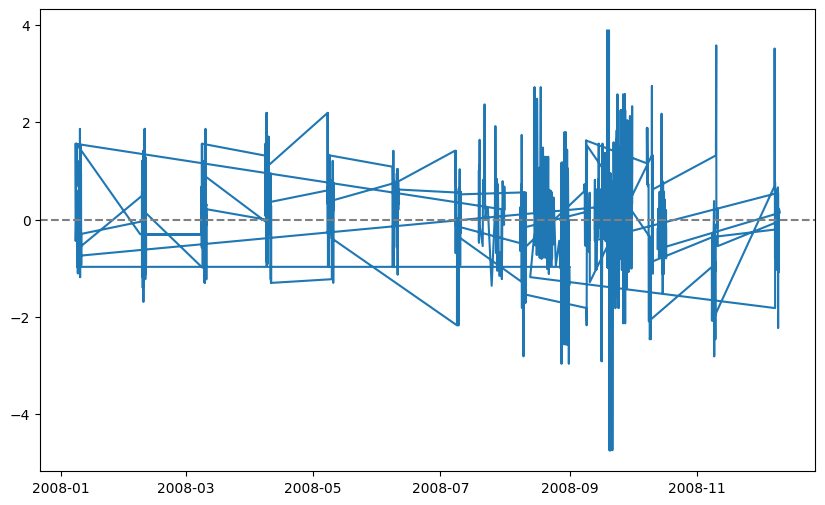

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['Time'], df['2'])
plt.axhline(y=0, color='gray', ls = '--')

In [ ]:
# # 'Date' 변수를 월 단위로 비닝
# df['Date_Binned'] = df['Time'].dt.to_period('M')

# # 결과 출력
# print("Original Data:")
# print(df.head())

In [ ]:
# df['Date_Binned']

In [ ]:
# plt.figure(figsize=(10,6))
# plt.plot(df['Date_Binned'] == '2008-09', df['48'])
# plt.axhline(y=0, color='gray', ls = '--')

In [ ]:
df['Pass/Fail'].value_counts(normalize=True)

-1    0.933631
 1    0.066369
Name: Pass/Fail, dtype: float64

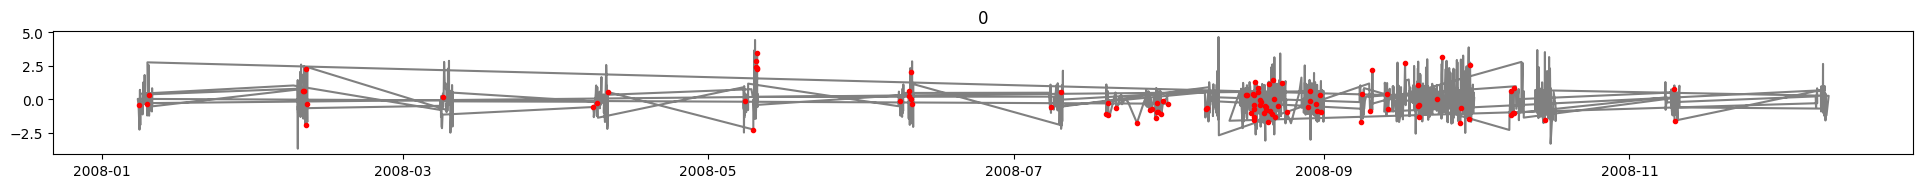

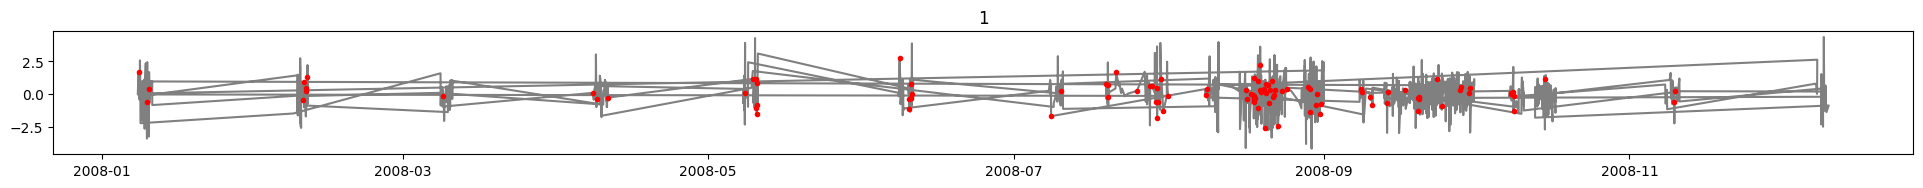

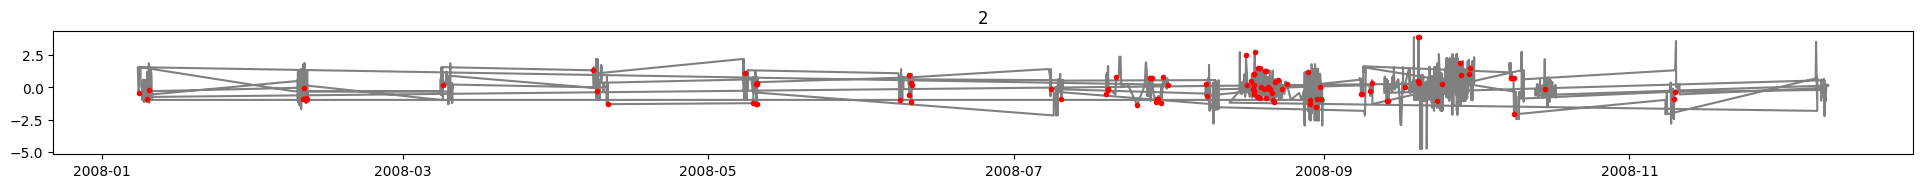

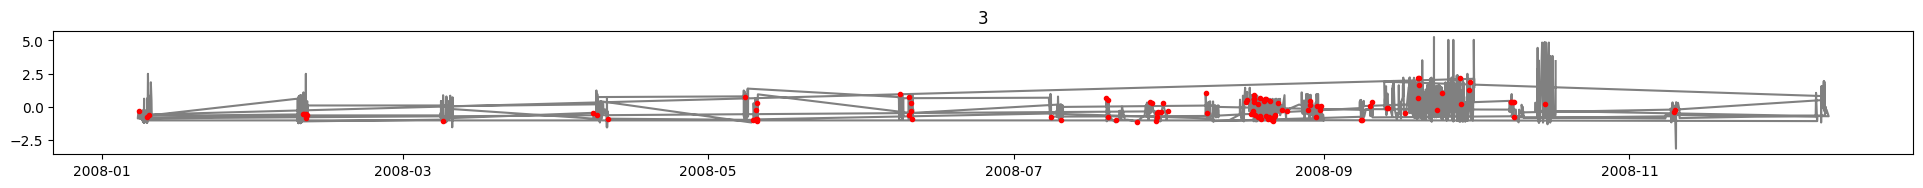

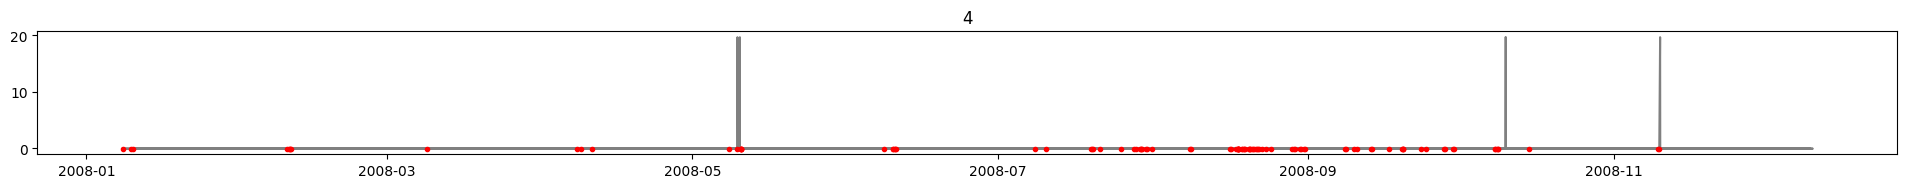

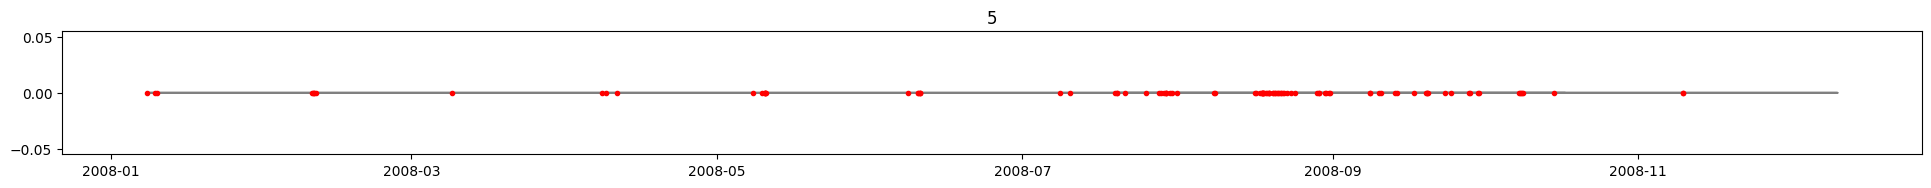

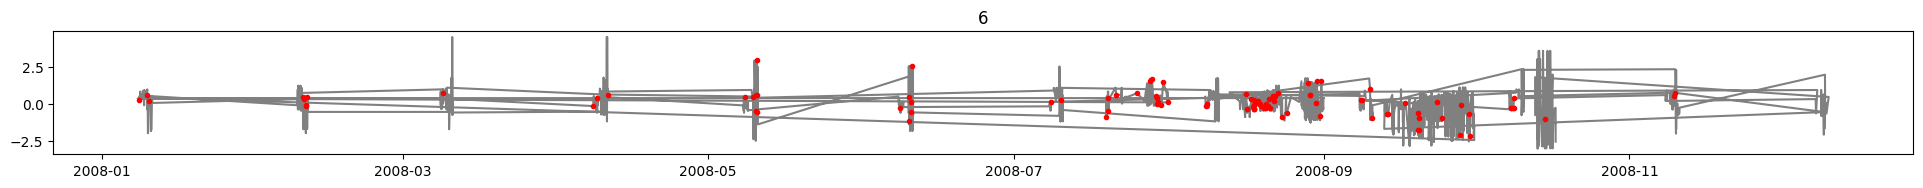

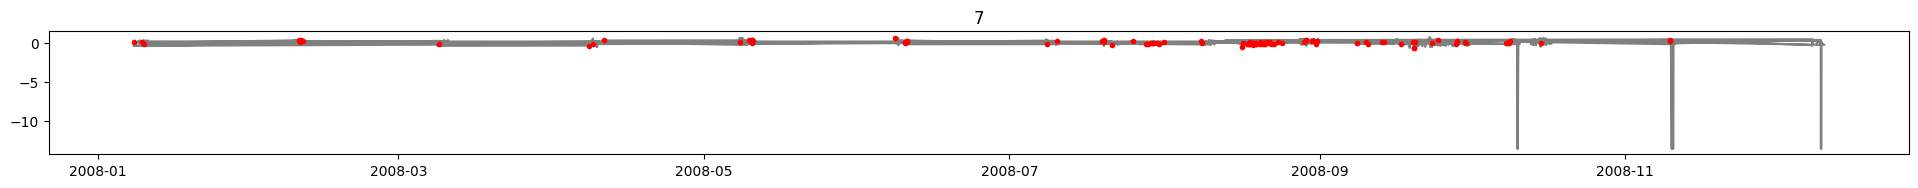

In [ ]:
# 'Pass/Fail'가 1인 데이터에 대해서 이상 포인트를 표시
for v, i in  enumerate(df.columns[1:9]) :
  plt.figure(figsize=(24,15))
  plt.subplot(8, 1, v+1)
  plt.plot(df['Time'], df[i], color='grey');
  plt.plot(df[df['Pass/Fail']==1]['Time'], df[df['Pass/Fail']==1][i], 'o', color='red', markersize=3 );
  plt.title(i)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import pandas as pd
import time

# 특성과 타겟 분리
X = df.drop(['Pass/Fail', 'Time'], axis=1)
y = df['Pass/Fail']

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# RandomForestClassifier 모델 생성
model = RandomForestClassifier(random_state=2024, n_estimators=100, max_depth=10, n_jobs=-1)

# 모델 훈련
model.fit(X_train, y_train)

# 훈련된 모델의 정확도 확인
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy}")

# Permutation Importance 계산
start_time = time.time()
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=2024, n_jobs=-1)
end_time = time.time()

# 결과 출력
perm_importance_df = pd.DataFrame({'Feature': X.columns, 'Permutation_Importance': perm_importance.importances_mean})
sorted_perm_importance = perm_importance_df.sort_values(by='Permutation_Importance', ascending=False)

print("\nPermutation Importance:")
print(sorted_perm_importance)

모델 정확도: 0.9554140127388535

Permutation Importance:
    Feature  Permutation_Importance
0         0                     0.0
374     397                     0.0
368     391                     0.0
369     392                     0.0
370     393                     0.0
..      ...                     ...
180     189                     0.0
179     188                     0.0
178     187                     0.0
177     186                     0.0
557     589                     0.0

[558 rows x 2 columns]


In [ ]:
# 특성과 타겟 분리
X = df.drop(['Pass/Fail', 'Time'], axis=1)
y = df['Pass/Fail']

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# RandomForestClassifier 모델 생성
model = RandomForestClassifier(random_state=2024)

# 모델 훈련
model.fit(X_train, y_train)

# 훈련된 모델의 정확도 확인
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy}")

# Feature Importance 계산
feature_importance = model.feature_importances_

# 결과 출력
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(sorted_feature_importance)

# Feature Importance가 0인 변수 출력
zero_importance_features = sorted_feature_importance[sorted_feature_importance['Importance'] == 0]['Feature'].tolist()
print("\nFeature Importance가 0인 변수들:")
print(zero_importance_features)

모델 정확도: 0.9554140127388535

Feature Importance:
    Feature  Importance
59       59    0.011357
64       64    0.011036
403     426    0.010761
40       40    0.008346
146     153    0.007979
..      ...         ...
134     141    0.000000
455     478    0.000000
326     342    0.000000
329     347    0.000000
375     398    0.000000

[558 rows x 2 columns]

Feature Importance가 0인 변수들:
['528', '179', '178', '276', '266', '534', '263', '262', '535', '529', '530', '264', '531', '265', '538', '532', '537', '536', '533', '261', '414', '258', '260', '230', '194', '206', '209', '5', '193', '192', '191', '190', '189', '186', '13', '226', '229', '231', '259', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '514', '515', '501', '513', '451', '69', '374', '373', '372', '449', '450', '371', '512', '370', '369', '458', '364', '461', '462', '375', '378', '74', '379', '380', '381', '394', '395', '396', '397', '399', '400', '401', '402', '403', '404', '422', '463',

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# 특성과 타겟 분리
X = df.drop(['Pass/Fail', 'Time'], axis=1)
y = df['Pass/Fail']

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# RandomForestClassifier 모델 생성 (트리 수와 최대 깊이 조정)
model_rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=2024)

# RFE 모델 생성 (Random Forest 기반)
rfe_rf = RFE(model_rf, n_features_to_select=10)

# RFE를 사용하여 특성 선택
X_train_rfe_rf = rfe_rf.fit_transform(X_train, y_train)
X_test_rfe_rf = rfe_rf.transform(X_test)

# 모델 훈련 (Random Forest 기반)
model_rf.fit(X_train_rfe_rf, y_train)

# 훈련된 모델의 정확도 확인 (Random Forest 기반)
y_pred_rf = model_rf.predict(X_test_rfe_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest 모델 정확도: {accuracy_rf}")

# LogisticRegression 모델 생성 (solver 변경)
model_lr = LogisticRegression(penalty='l1', solver='saga', random_state=2024)

# 모델 훈련 (L1 기반)
model_lr.fit(X_train, y_train)

# 훈련된 모델의 정확도 확인 (L1 기반)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression 모델 정확도: {accuracy_lr}")

# 선택된 변수 확인 (Random Forest 기반)
selected_features_rf = X.columns[rfe_rf.support_]
print("\nRandom Forest 기반 선택된 변수:")
print(selected_features_rf)

# 선택된 변수 확인 (L1 기반)
selected_features_lr = X.columns[model_lr.coef_[0] != 0]
print("\nLogistic Regression(L1) 기반 선택된 변수:")
print(selected_features_lr)

Random Forest 모델 정확도: 0.9554140127388535
Logistic Regression 모델 정확도: 0.9490445859872612

Random Forest 기반 선택된 변수:
Index(['21', '59', '64', '65', '132', '287', '301', '348', '426', '477'], dtype='object')

Logistic Regression(L1) 기반 선택된 변수:
Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10',
       ...
       '576', '577', '582', '583', '584', '585', '586', '587', '588', '589'],
      dtype='object', length=418)


정확도가 더 높은 Random Forest 모델을 선택

In [ ]:
df = df[['Time', '21', '59', '64', '65', '132', '287', '301', '348', '426', '477', 'Pass/Fail']]

In [ ]:
df.head()

,Time,21,59,64,65,132,287,301,348,426,477,Pass/Fail
0,2008-07-19 11:55:00,0.318204,-0.491821,0.238007,0.337792,-0.410894,-0.031667,-0.909515,-0.270326,0.495973,-0.043580,-1
1,2008-07-19 12:32:00,0.282297,-0.225932,-0.271190,0.069989,-0.476728,-0.027266,-0.286390,-0.885912,0.253031,-0.044562,-1
2,2008-07-19 13:17:00,0.272323,2.189516,-0.877557,-0.400161,-1.116262,-0.029744,-0.644054,-1.197920,0.595741,0.281305,1
3,2008-07-19 14:43:00,0.239608,2.247716,-0.989014,-0.513836,1.159726,0.002799,-0.842623,1.348747,0.311707,0.021281,-1
4,2008-07-19 15:22:00,0.226841,-1.600848,2.361876,2.390361,0.996080,-0.032263,1.325358,-0.008914,0.060728,-0.005895,-1


## **🍁 Data Analysis 3단계**  
**┗ 이상탐지(분류) 및 모델링**  
---

```
'Class' 이상여부를 판단할 수 있는 ML알고리즘 학습/예측 평가
"Q. 어떻게 Class가 1인 데이터를 추출할 수 있을까?"

※ 수강생 학습 및 적용해야하는 사항 (*추가 학습 자료 활용)
 - 이상탐지 개념 및 목적 이해
 - 머신러닝 개념 및 분석 코드 이해
 - 이상탐지(Anomaly Detection) 및 분류(Classification) 알고리즘 이해
 - "여러 알고리즘 중 왜 해당 알고리즘을 사용했는가?"에 대한 답변도 준비하면 좋음
 - Feature Selection / Feature Extraction 개념 이해 및 적용해보기
```  

### · Modeling
---
> **데이터 사전 준비**

```
* 모델은 숫자로 이루어진 형태의 Data만 인식 가능 (※ 문자형 변수 인코딩 필요)
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할
* Categorical value 인코딩
```
> **Model Selection (classification)**

```
* 로지스틱 모델 (logistic regression)
* Tree 계열 Classification 모델
  - bagging 앙상블 (Randomforest)
  - boosting 앙상블 (lightGBM)
```
> **Model 학습**

```
* Model Selection 단계에서 선정한 모델들을 학습하고 성능을 기록
* 동일한 Data set, 동일한 환경에서 동일한 비교 지표로 성능을 비교
```

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 특성과 타겟 분리
X = df.drop(['Pass/Fail', 'Time'], axis=1)
y = df['Pass/Fail']

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Logistic Regression 모델 생성
model_lr = LogisticRegression(random_state=2024)

# RFE 모델 생성 (Logistic Regression 기반)
rfe_lr = RFE(model_lr, n_features_to_select=10)  # 선택할 특성의 개수를 조정할 수 있습니다.

# RFE를 사용하여 특성 선택
X_train_rfe_lr = rfe_lr.fit_transform(X_train, y_train)
X_test_rfe_lr = rfe_lr.transform(X_test)

# 선택된 변수 확인 (Logistic Regression 기반)
selected_features_lr = X.columns[rfe_lr.support_]
print("\nLogistic Regression 기반 선택된 변수:")
print(selected_features_lr)

# 모델 훈련 (Logistic Regression 기반)
model_lr.fit(X_train_rfe_lr, y_train)

# 모델 예측
y_pred_lr = model_lr.predict(X_test_rfe_lr)

# 정확도 및 분류 보고서 출력
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nLogistic Regression 모델 정확도: {accuracy_lr}")
print("\nLogistic Regression 모델 분류 보고서:")
print(classification_report(y_test, y_pred_lr))



Logistic Regression 기반 선택된 변수:
Index(['21', '59', '64', '65', '132', '287', '301', '348', '426', '477'], dtype='object')

Logistic Regression 모델 정확도: 0.9522292993630573

Logistic Regression 모델 분류 보고서:
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       300
           1       0.00      0.00      0.00        14

    accuracy                           0.95       314
   macro avg       0.48      0.50      0.49       314
weighted avg       0.91      0.95      0.93       314



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 특성과 타겟 분리
X = df.drop(['Pass/Fail', 'Time'], axis=1)
y = df['Pass/Fail']

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# RandomForestClassifier 모델 생성
model_rf = RandomForestClassifier(random_state=2024)

# RFE 모델 생성 (Random Forest 기반)
rfe_rf = RFE(model_rf, n_features_to_select=10)  # 선택할 특성의 개수를 조정할 수 있습니다.

# RFE를 사용하여 특성 선택
X_train_rfe_rf = rfe_rf.fit_transform(X_train, y_train)
X_test_rfe_rf = rfe_rf.transform(X_test)

# 선택된 변수 확인 (Random Forest 기반)
selected_features_rf = X.columns[rfe_rf.support_]
print("\nRandom Forest 기반 선택된 변수:")
print(selected_features_rf)

# 모델 훈련 (Random Forest 기반)
model_rf.fit(X_train_rfe_rf, y_train)

# 모델 예측
y_pred_rf = model_rf.predict(X_test_rfe_rf)

# 정확도 및 분류 보고서 출력
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest 모델 정확도: {accuracy_rf}")
print("\nRandom Forest 모델 분류 보고서:")
print(classification_report(y_test, y_pred_rf))


Random Forest 기반 선택된 변수:
Index(['21', '59', '64', '65', '132', '287', '301', '348', '426', '477'], dtype='object')

Random Forest 모델 정확도: 0.9554140127388535

Random Forest 모델 분류 보고서:
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       300
           1       0.00      0.00      0.00        14

    accuracy                           0.96       314
   macro avg       0.48      0.50      0.49       314
weighted avg       0.91      0.96      0.93       314



In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 특성과 타겟 분리
X = df.drop(['Pass/Fail', 'Time'], axis=1)
y = df['Pass/Fail']

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# LightGBM 모델 생성
model_lgb = lgb.LGBMClassifier(random_state=2024)

# RFE 모델 생성 (LightGBM 기반)
rfe_lgb = RFE(model_lgb, n_features_to_select=10)  # 선택할 특성의 개수를 조정할 수 있습니다.

# RFE를 사용하여 특성 선택
X_train_rfe_lgb = rfe_lgb.fit_transform(X_train, y_train)
X_test_rfe_lgb = rfe_lgb.transform(X_test)

# 선택된 변수 확인 (LightGBM 기반)
selected_features_lgb = X.columns[rfe_lgb.support_]
print("\nLightGBM 기반 선택된 변수:")
print(selected_features_lgb)

# 모델 훈련 (LightGBM 기반)
model_lgb.fit(X_train_rfe_lgb, y_train)

# 모델 예측
y_pred_lgb = model_lgb.predict(X_test_rfe_lgb)

# 정확도 및 분류 보고서 출력
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"\nLightGBM 모델 정확도: {accuracy_lgb}")
print("\nLightGBM 모델 분류 보고서:")
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 90, number of negative: 1163
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2542
[LightGBM] [Info] Number of data points in the train set: 1253, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.071828 -> initscore=-2.558948
[LightGBM] [Info] Start training from score -2.558948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LightGBM 기반 선택된 변수:
Index(['21', '59', '64', '65', '132', '287', '301', '348', '426', '477'], dtype='object')
[LightGBM] [Info] Number of positive: 90, number of negative: 1163
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2542
[LightGBM] [Info] Number of data points in the train set: 1253

In [ ]:
# 정확도 및 분류 보고서 출력
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nLogistic Regression 모델 정확도: {accuracy_lr}")
print("\nLogistic Regression 모델 분류 보고서:")
print(classification_report(y_test, y_pred_lr))

# 정확도 및 분류 보고서 출력
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest 모델 정확도: {accuracy_rf}")
print("\nRandom Forest 모델 분류 보고서:")
print(classification_report(y_test, y_pred_rf))

# 정확도 및 분류 보고서 출력
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"\nLightGBM 모델 정확도: {accuracy_lgb}")
print("\nLightGBM 모델 분류 보고서:")
print(classification_report(y_test, y_pred_lgb))


Logistic Regression 모델 정확도: 0.9522292993630573

Logistic Regression 모델 분류 보고서:
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       300
           1       0.00      0.00      0.00        14

    accuracy                           0.95       314
   macro avg       0.48      0.50      0.49       314
weighted avg       0.91      0.95      0.93       314


Random Forest 모델 정확도: 0.9554140127388535

Random Forest 모델 분류 보고서:
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       300
           1       0.00      0.00      0.00        14

    accuracy                           0.96       314
   macro avg       0.48      0.50      0.49       314
weighted avg       0.91      0.96      0.93       314


LightGBM 모델 정확도: 0.9554140127388535

LightGBM 모델 분류 보고서:
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       300
           1       0.00      0.

정확도와 각각의 성능 지표에 따라 Random Forest 모델을 선택

## **⛄ Data Analysis 4단계**  
**┗ 해석 및 결론**  
---

```
모델을 통해서 도출된 결과물을 이해하고, 어떻게 활용할 것인지에 대해 정리

※ 수강생 학습 및 적용해야하는 사항 (*추가 학습 자료 활용)
 - 모델에서 중요한 변수 확인 (Feature Importance, Permutataion Importance 개념)
 - 사전에 정의한 문제를 해결한 결론 작성 필요
```

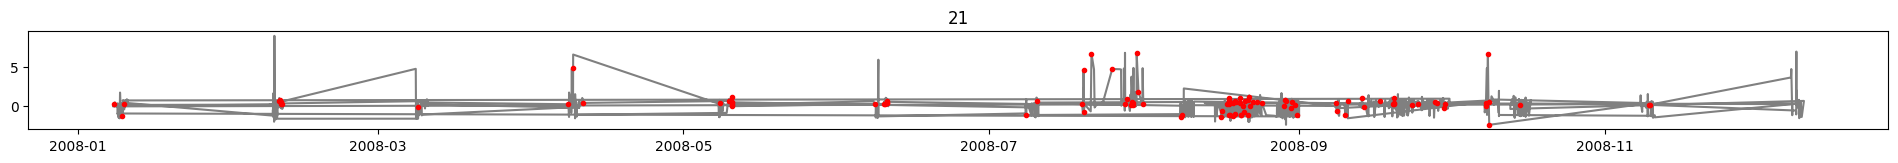

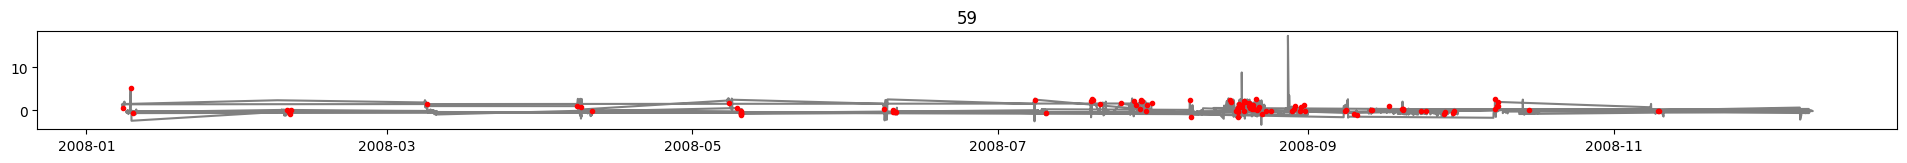

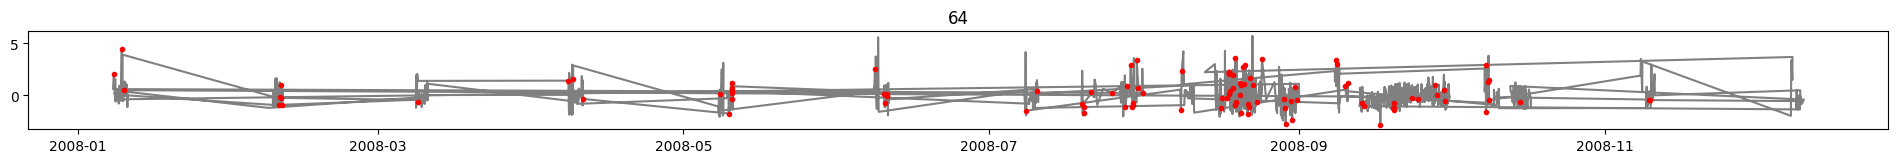

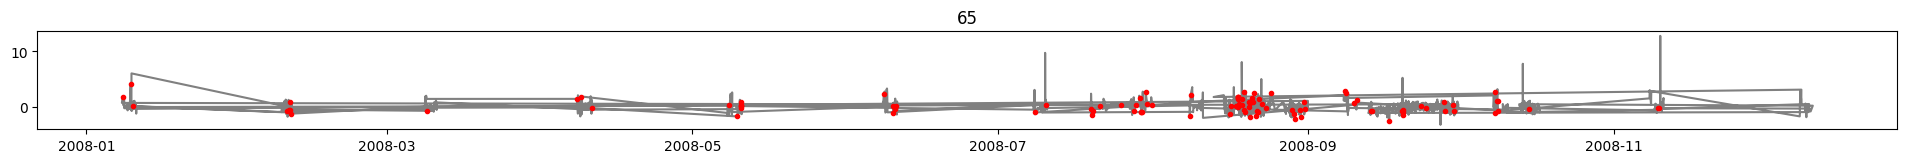

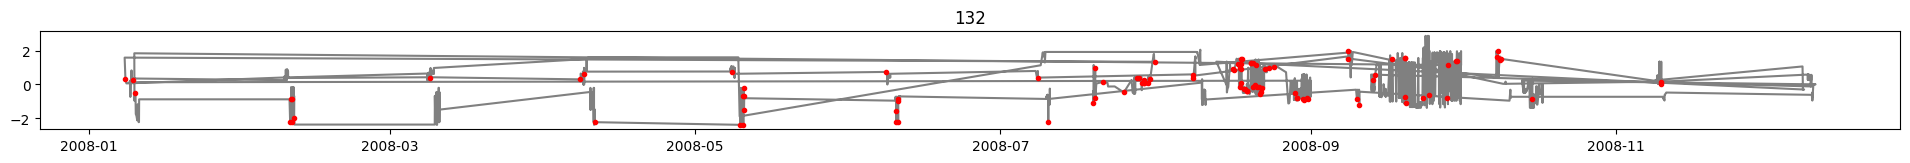

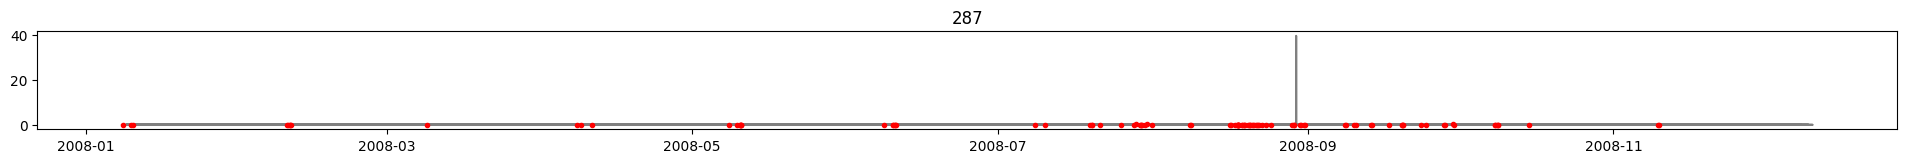

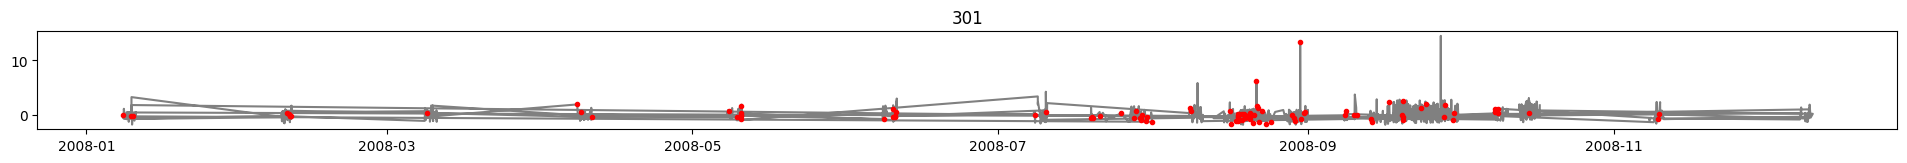

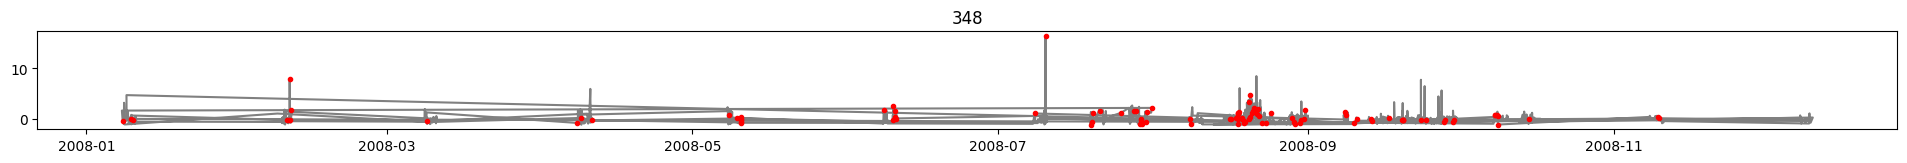

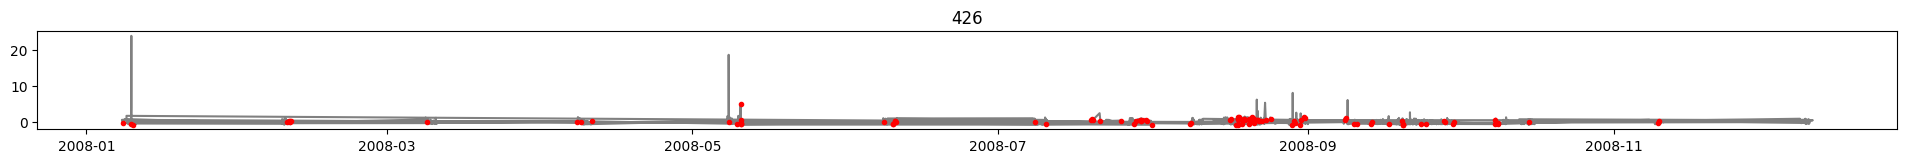

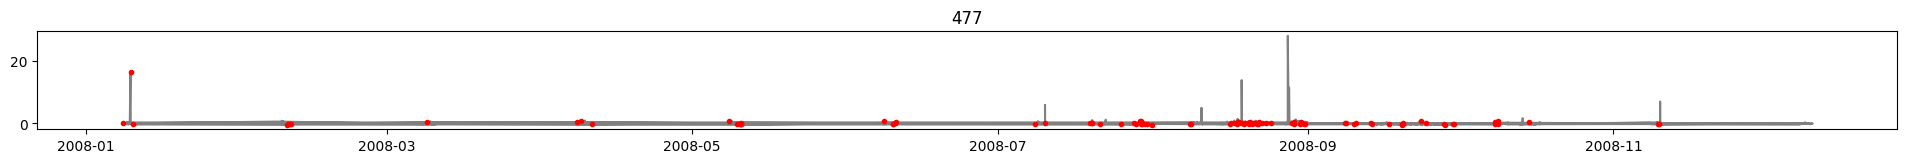

In [ ]:
# '21', '59', '64', '65', '132', '287', '301', '348', '426', '477' 변수 선택
for v, i in  enumerate(df.columns[1:11]) :
  plt.figure(figsize=(24,15))
  plt.subplot(10, 1, v+1)
  plt.plot(df['Time'], df[i], color='grey');
  plt.plot(df[df['Pass/Fail']==1]['Time'], df[df['Pass/Fail']==1][i], 'o', color='red', markersize=3 );
  plt.title(i)

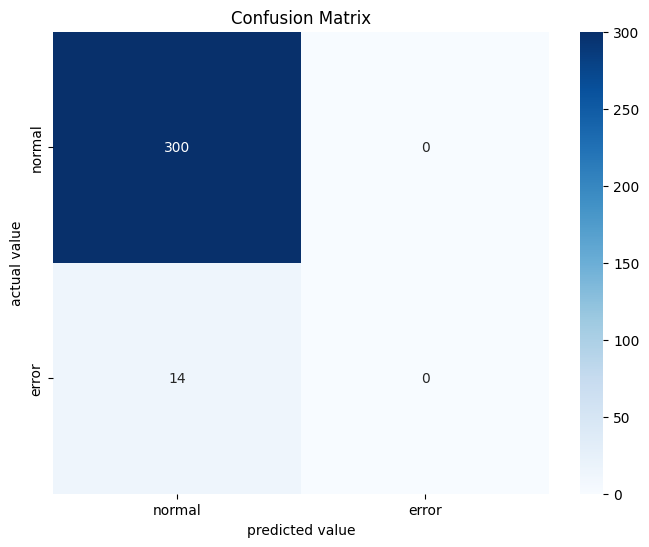

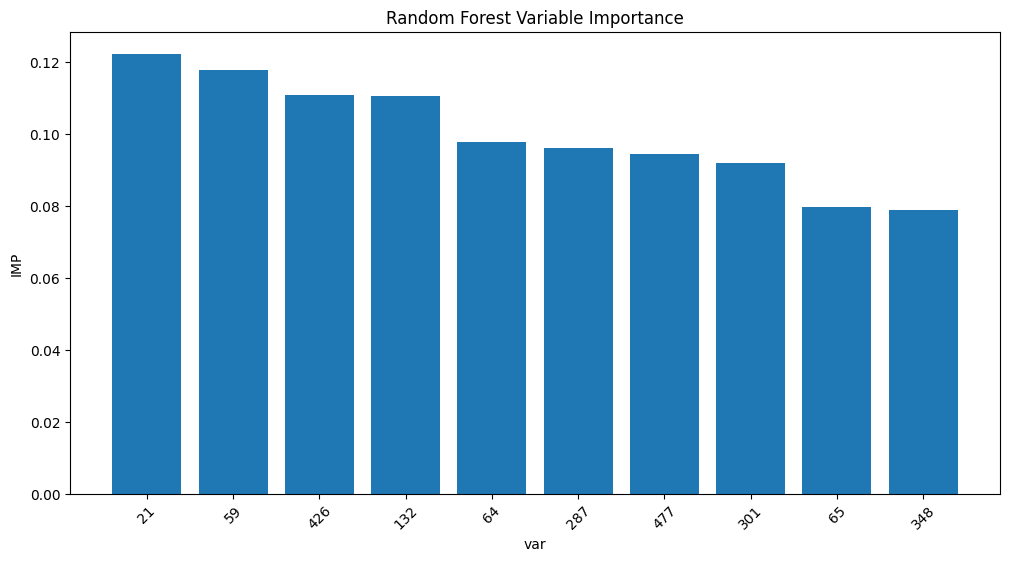

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'error'], yticklabels=['normal', 'error'])
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.title('Confusion Matrix')
plt.show()

# 변수 중요도 시각화
feature_importance = model_rf.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(sorted_idx)), selected_features_rf[sorted_idx], rotation=45)
plt.xlabel('var')
plt.ylabel('IMP')
plt.title('Random Forest Variable Importance')
plt.show()


### · 결론 및 기대효과
---

> 결론 및 향후계획

```
* 총 10개의 변수가 선택되었으며, 선택된 알고리즘을 활용하여 한 달 주기로 머신러닝 모델을 실행할 것입니다.
향후, 추가적으로 수집되는 데이터에 대하여 3개월의 간격을 가지고 모델을 점검하도록 하겠습니다.
```

> 기대효과

```
* 이를 통해, 불량의 횟수가 현저히 줄어듦을 예상합니다.
```